
## Load HRET ssh, load bathymetry and try masking shallow depths


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import numpy as np
import xarray as xr
from utide._ut_constants import ut_constants as utide

from utils import *

# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy

#datadir = '/home2/pharos/othr/aponte/tides/HRET/'
datadir = './'

In [2]:
# load hret for one constituent
hret = xr.open_dataset(datadir+'Carrere_HRET_testing.nc',chunks={'longitude': 500, 'latitude': 500})
#hret = hret.sel(longitude=slice(140.,270.),latitude=slice(-40.,40.))
print(hret)

<xarray.Dataset>
Dimensions:    (latitude: 2640, longitude: 7200)
Coordinates:
  * longitude  (longitude) float64 0.0 0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 ...
  * latitude   (latitude) float64 -66.0 -65.95 -65.9 -65.85 -65.8 -65.75 ...
Data variables:
    M2re       (latitude, longitude) float64 dask.array<shape=(2640, 7200), chunksize=(500, 500)>
    M2im       (latitude, longitude) float64 dask.array<shape=(2640, 7200), chunksize=(500, 500)>
    K1re       (latitude, longitude) float64 dask.array<shape=(2640, 7200), chunksize=(500, 500)>
    K1im       (latitude, longitude) float64 dask.array<shape=(2640, 7200), chunksize=(500, 500)>
    S2re       (latitude, longitude) float64 dask.array<shape=(2640, 7200), chunksize=(500, 500)>
    S2im       (latitude, longitude) float64 dask.array<shape=(2640, 7200), chunksize=(500, 500)>
    O1re       (latitude, longitude) float64 dask.array<shape=(2640, 7200), chunksize=(500, 500)>
    O1im       (latitude, longitude) float64 dask.array<shape=(

In [3]:
# consituents
constituents = ['M2','N2','S2','K1','O1','P1']

omega = dict()
for cst,o in zip(utide['const']['name'], utide['const']['freq']):
    if cst in constituents:
        omega[cst] = o*24. # cpd, input frequencies are cph
        print(cst+' omega=%e rad/s, %.3f cpd'%(o*2.*np.pi/3600., o*24.))

O1 omega=6.759774e-05 rad/s, 0.930 cpd
P1 omega=7.252295e-05 rad/s, 0.997 cpd
K1 omega=7.292116e-05 rad/s, 1.003 cpd
N2 omega=1.378797e-04 rad/s, 1.896 cpd
M2 omega=1.405189e-04 rad/s, 1.932 cpd
S2 omega=1.454441e-04 rad/s, 2.000 cpd


In [4]:
# load bathymetry and a minimum water for analysis
h = load_bathy(lon=hret.longitude, lat=hret.latitude)
print(h)
hc=1000. # locations with depth lower than hc are not considered in statistics

<xarray.DataArray 'z' (y: 5400, x: 10800)>
array([[-2774., -2774., -2774., ..., -2774., -2774., -2776.],
       [-2772., -2772., -2772., ..., -2774., -2774., -2774.],
       [-2772., -2772., -2772., ..., -2772., -2772., -2772.],
       ...,
       [ 4113.,  4113.,  4113., ...,  4113.,  4113.,  4113.],
       [ 4117.,  4117.,  4117., ...,  4117.,  4117.,  4117.],
       [ 4119.,  4119.,  4119., ...,  4119.,  4119.,  4119.]])
Coordinates:
  * x        (x) float32 -179.98334 -179.95 -179.91667 -179.88333 -179.85 ...
  * y        (y) float32 -89.98333 -89.95 -89.916664 -89.88333 -89.85 ...
(10800,)
(2640, 7200)
(7200,)
(2640,)
<xarray.DataArray (latitude: 2640, longitude: 7200)>
array([[3458.      , 3565.999998, 3547.000002, ..., 3610.016667, 3561.998901,
        3514.016468],
       [3502.997253, 3489.002747, 3464.004761, ..., 3700.999452, 3608.986815,
        3553.008049],
       [3551.999863, 3526.999451, 3491.998216, ..., 3753.003755, 3681.487249,
        3607.015002],
       ...,
    

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


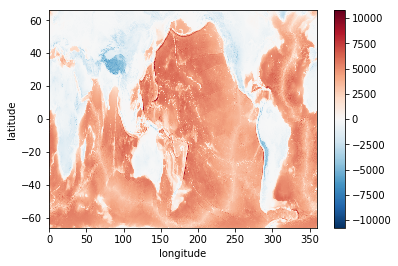

In [5]:
h.plot()

---

# ssh maps and statistics


/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


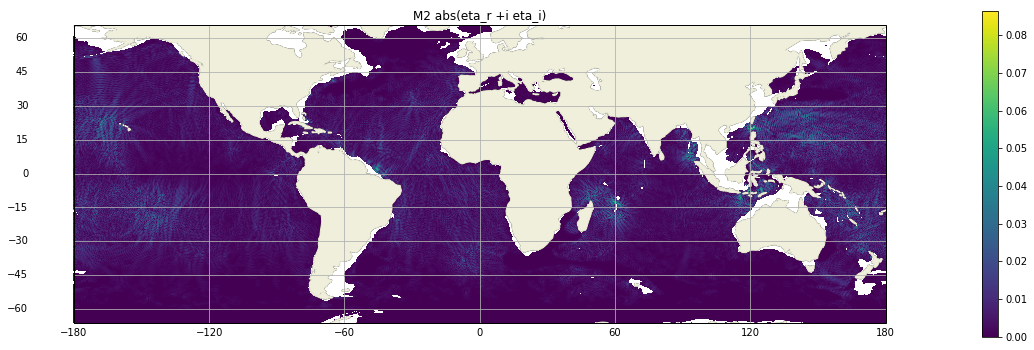

In [8]:
cst='M2'

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection=crs)
#
toplt = np.abs(hret[cst+'re']+j*hret[cst+'im'])
toplt = toplt.where(h>hc)
toplt.plot(transform=crs)
ax.set_title(cst+' abs(eta_r +i eta_i)')
gl = ax.gridlines(crs=crs, draw_labels=True) 
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
plt.show()


/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


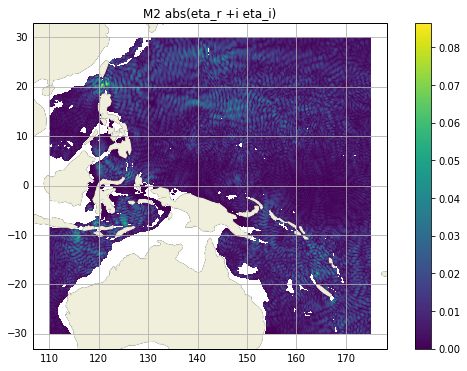

In [9]:
# zoom 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection=crs)
#
toplt = np.abs(hret[cst+'re']+j*hret[cst+'im'])
toplt = toplt.sel(longitude=slice(110.,175.),latitude=slice(-30.,30.))
toplt = toplt.where(h>hc)
toplt.plot(transform=crs)
ax.set_title(cst+' abs(eta_r +i eta_i)')
gl = ax.gridlines(crs=crs, draw_labels=True) 
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
plt.show()